In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df=pd.read_csv(r"D:\Norka\Intenship\dataset\250000 Records-new..csv")

In [3]:
df

,Emp ID,Name Prefix,First Name,Gender,Age in Yrs,Date of Joining,Age in Company (Years),Country,Region,Salary
0,857211,Ms.,Hermila,F,24,09-09-2014,2,Clay,South,168991
1,514341,Mr.,Antonio,M,27,08-02-2011,5,Screven,South,53504
2,314598,Prof.,Sebastian,M,36,04-01-2012,5,Jefferson,Northeast,158859
3,987773,Mr.,Alec,M,43,3-19-1998,19,Milledgeville,South,76105
4,690850,Mr.,Reggie,M,50,01-04-2010,7,Greene,Midwest,134436
...,...,...,...,...,...,...,...,...,...,...
249994,416214,Mr.,Tracey,M,47,3-29-2007,11,Columbia,South,170139
249995,804940,Mr.,Alan,M,29,11-01-2015,1,Plymouth,Northeast,84230
249996,484412,Mr.,Francis,M,55,11-29-1992,24,Fremont,West,74172
249997,853493,Ms.,Edith,F,28,02-12-2017,1,Kingman,Midwest,137696


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249999 entries, 0 to 249998
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Emp ID                  249999 non-null  int64 
 1   Name Prefix             249999 non-null  object
 2   First Name              249999 non-null  object
 3   Gender                  249999 non-null  object
 4   Age in Yrs              249999 non-null  int64 
 5   Date of Joining         249999 non-null  object
 6   Age in Company (Years)  249999 non-null  int64 
 7   Country                 249999 non-null  object
 8   Region                  249999 non-null  object
 9   Salary                  249999 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 19.1+ MB


In [5]:
df.isnull().sum()

Emp ID                    0
Name Prefix               0
First Name                0
Gender                    0
Age in Yrs                0
Date of Joining           0
Age in Company (Years)    0
Country                   0
Region                    0
Salary                    0
dtype: int64

In [6]:
df.describe()

,Emp ID,Age in Yrs,Age in Company (Years),Salary
count,249999.000000,249999.000000,249999.000000,249999.000000
mean,555637.933052,39.986348,9.423846,120012.677971
std,256626.164618,11.226959,8.474282,46213.396976
min,111118.000000,21.000000,1.000000,40000.000000
25%,333388.500000,30.000000,2.000000,79930.500000
50%,556113.000000,40.000000,7.000000,120024.000000
75%,777772.500000,50.000000,14.000000,160065.000000
max,999995.000000,60.000000,38.000000,200000.000000


In [7]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
249994    False
249995    False
249996    False
249997    False
249998    False
Length: 249999, dtype: bool

In [8]:
df.duplicated("Emp ID")

0         False
1         False
2         False
3         False
4         False
          ...  
249994     True
249995    False
249996     True
249997     True
249998    False
Length: 249999, dtype: bool

In [9]:
df.shape

(249999, 10)

In [10]:
df=df.drop_duplicates("Emp ID")

In [11]:
df.shape

(219433, 10)

In [12]:
df.dtypes

Emp ID                     int64
Name Prefix               object
First Name                object
Gender                    object
Age in Yrs                 int64
Date of Joining           object
Age in Company (Years)     int64
Country                   object
Region                    object
Salary                     int64
dtype: object

In [13]:
df.head(15)

,Emp ID,Name Prefix,First Name,Gender,Age in Yrs,Date of Joining,Age in Company (Years),Country,Region,Salary
0,857211,Ms.,Hermila,F,24,09-09-2014,2,Clay,South,168991
1,514341,Mr.,Antonio,M,27,08-02-2011,5,Screven,South,53504
2,314598,Prof.,Sebastian,M,36,04-01-2012,5,Jefferson,Northeast,158859
3,987773,Mr.,Alec,M,43,3-19-1998,19,Milledgeville,South,76105
4,690850,Mr.,Reggie,M,50,01-04-2010,7,Greene,Midwest,134436
5,358257,Prof.,Elisha,M,44,5-22-2015,2,Chelan,West,119237
6,303899,Mr.,Danilo,M,52,2-14-1994,23,Polk,Midwest,115449
7,901163,Ms.,Madalene,F,59,3-21-2011,6,Columbia,West,104968
8,640135,Drs.,Micheal,F,47,9-13-2001,15,Trumbull,Midwest,71948
9,775378,Mrs.,Wilma,F,50,7-19-1998,19,Doña Ana,West,114397


In [14]:
df.value_counts("Region")

Region
South        81508
Midwest      60071
West         38968
Northeast    38886
dtype: int64

In [15]:
df.value_counts("First Name")

First Name
Adam         148
Kelley       146
Richard      145
Blake        144
Jan          142
            ... 
Jeraldine     13
Edythe        12
Phebe         12
Ellyn         12
Latonia       12
Length: 5163, dtype: int64

In [16]:
df.value_counts("Name Prefix")

Name Prefix
Mr.      76943
Ms.      48575
Mrs.     36611
Hon.     23122
Drs.     12343
Dr.      10999
Prof.    10840
dtype: int64

In [17]:
df.value_counts("Country")

Country
Los Angeles    2670
Jefferson      2605
Washington     2501
Montgomery     2066
Orange         1834
               ... 
Burnwell          1
Poe               1
Dover             1
Eagleville        1
Underhill         1
Length: 2746, dtype: int64

In [18]:
df[["Emp ID", "Name Prefix","First Name", "Gender", "Age in Yrs", "Date of Joining", "Age in Company (Years)", "Country","Region","Salary"]] =df[["Emp ID", "Name Prefix","First Name", "Gender", "Age in Yrs", "Date of Joining", "Age in Company (Years)", "Country","Region","Salary"]].replace(0,np.NaN)

In [19]:
df.isnull().sum()

Emp ID                    0
Name Prefix               0
First Name                0
Gender                    0
Age in Yrs                0
Date of Joining           0
Age in Company (Years)    0
Country                   0
Region                    0
Salary                    0
dtype: int64

array([[<AxesSubplot:title={'center':'Emp ID'}>,
        <AxesSubplot:title={'center':'Age in Yrs'}>],
       [<AxesSubplot:title={'center':'Age in Company (Years)'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

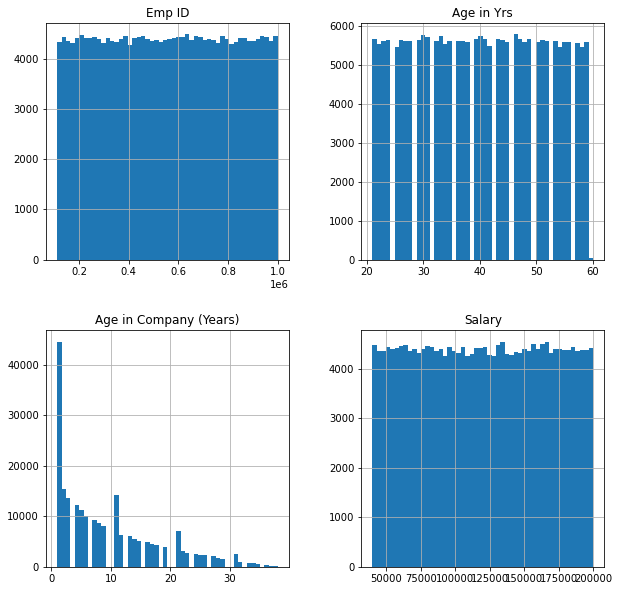

In [20]:
df.hist(bins=50,figsize=(10,10))

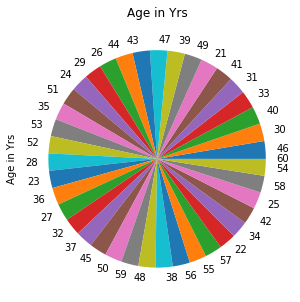

In [21]:
df["Age in Yrs"].value_counts().plot(kind='pie', title='Age in Yrs',figsize=(10,5))
plt.show()

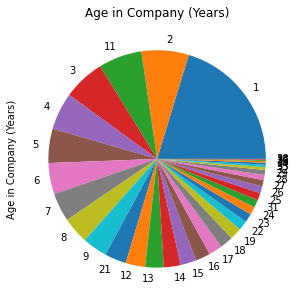

In [22]:
df["Age in Company (Years)"].value_counts().plot(kind='pie', title='Age in Company (Years)',figsize=(10,5))
plt.show()

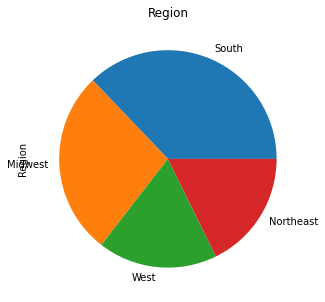

In [23]:
df["Region"].value_counts().plot(kind='pie', title='Region',figsize=(10,5))
plt.show()

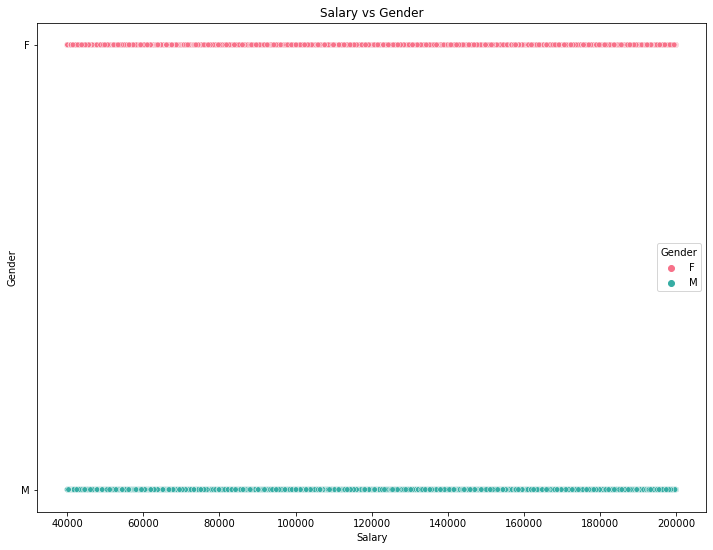

In [24]:
plt.figure(figsize=(12,9))
plt.title("Salary vs Gender")
sns.scatterplot(df["Salary"],y=df["Gender"],hue=df["Gender"],s=30,palette="husl")
plt.show()

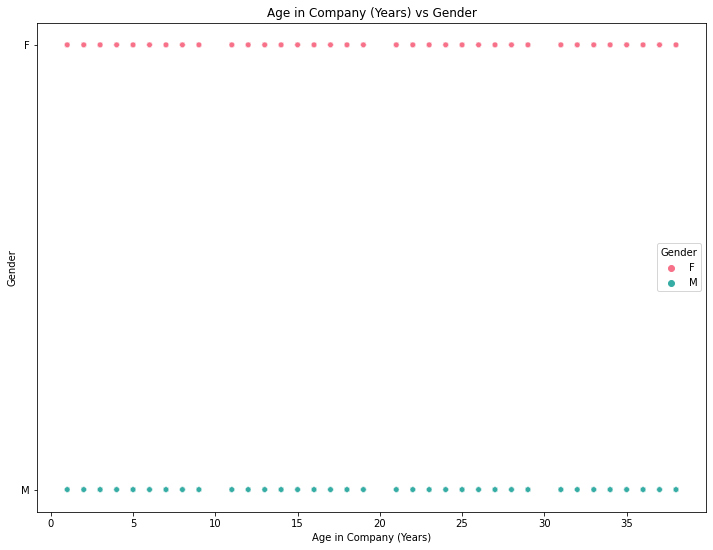

In [25]:
plt.figure(figsize=(12,9))
plt.title("Age in Company (Years) vs Gender")
sns.scatterplot(df["Age in Company (Years)"],y=df["Gender"],hue=df["Gender"],s=30,palette="husl")
plt.show()

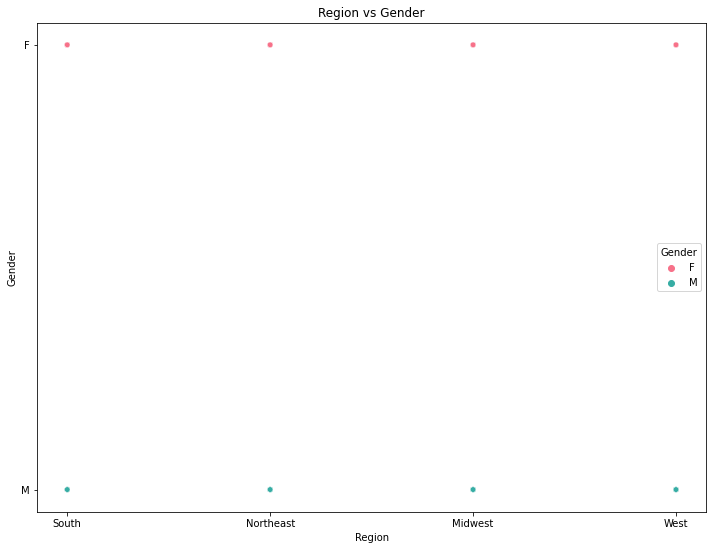

In [26]:
plt.figure(figsize=(12,9))
plt.title("Region vs Gender")
sns.scatterplot(df["Region"],y=df["Gender"],hue=df["Gender"],s=30,palette="husl")
plt.show()

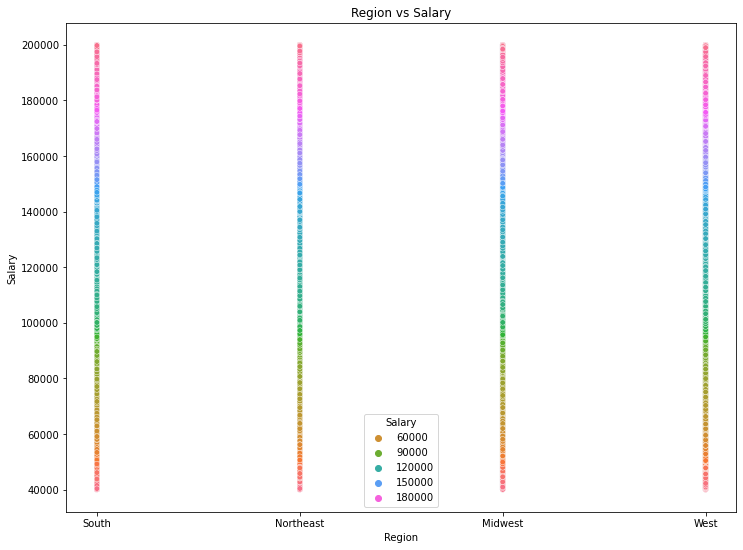

In [27]:
plt.figure(figsize=(12,9))
plt.title("Region vs Salary")
sns.scatterplot(df["Region"],y=df["Salary"],hue=df["Salary"],s=30,palette="husl")
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Gender'].value_counts()

0    109767
1    109666
Name: Gender, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
df['Name Prefix'] = LabelEncoder().fit_transform(df['Name Prefix'])
df['Name Prefix'].value_counts()

3    76943
5    48575
4    36611
2    23122
1    12343
0    10999
6    10840
Name: Name Prefix, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
df['First Name'] = LabelEncoder().fit_transform(df['First Name'])
df['First Name'].value_counts()

14      148
2580    146
4063    145
498     144
2155    142
       ... 
1898     13
3898     12
1452     12
2790     12
1377     12
Name: First Name, Length: 5163, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
df['Country'] = LabelEncoder().fit_transform(df['Country'])
df['Country'].value_counts()

1466    2670
1233    2605
2605    2501
1665    2066
1841    1834
        ... 
1246       1
1662       1
2552       1
2484       1
1829       1
Name: Country, Length: 2746, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
df['Region'] = LabelEncoder().fit_transform(df['Region'])
df['Region'].value_counts()

2    81508
0    60071
3    38968
1    38886
Name: Region, dtype: int64

In [34]:
df.dtypes

Emp ID                     int64
Name Prefix                int32
First Name                 int32
Gender                     int32
Age in Yrs                 int64
Date of Joining           object
Age in Company (Years)     int64
Country                    int32
Region                     int32
Salary                     int64
dtype: object

In [35]:
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])
df['Date of Joining'] 

0        2014-09-09
1        2011-08-02
2        2012-04-01
3        1998-03-19
4        2010-01-04
            ...    
249991   2017-01-15
249992   1986-04-01
249993   2001-08-26
249995   2015-11-01
249998   2011-08-11
Name: Date of Joining, Length: 219433, dtype: datetime64[ns]

In [36]:
df['Date of Joining'] .dt.year

0         2014
1         2011
2         2012
3         1998
4         2010
          ... 
249991    2017
249992    1986
249993    2001
249995    2015
249998    2011
Name: Date of Joining, Length: 219433, dtype: int64

In [37]:
df['Date of Joining'] .dt.month

0          9
1          8
2          4
3          3
4          1
          ..
249991     1
249992     4
249993     8
249995    11
249998     8
Name: Date of Joining, Length: 219433, dtype: int64

In [38]:
df['Date of Joining'] .dt.day

0          9
1          2
2          1
3         19
4          4
          ..
249991    15
249992     1
249993    26
249995     1
249998    11
Name: Date of Joining, Length: 219433, dtype: int64

In [39]:
df['year']=df['Date of Joining'] .dt.year
df['month']=df['Date of Joining'] .dt.month
df['day']=df['Date of Joining'] .dt.day
df

,Emp ID,Name Prefix,First Name,Gender,Age in Yrs,Date of Joining,Age in Company (Years),Country,Region,Salary,year,month,day
0,857211,5,1952,0,24,2014-09-09,2,522,2,168991,2014,9,9
1,514341,3,276,1,27,2011-08-02,5,2219,2,53504,2011,8,2
2,314598,6,4288,1,36,2012-04-01,5,1233,1,158859,2012,4,1
3,987773,3,81,1,43,1998-03-19,19,1625,2,76105,1998,3,19
4,690850,3,4013,1,50,2010-01-04,7,1019,0,134436,2010,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249991,978813,3,3923,1,24,2017-01-15,1,2076,0,69511,2017,1,15
249992,171778,4,1826,0,53,1986-04-01,31,1309,2,75944,1986,4,1
249993,942220,6,1282,1,46,2001-08-26,15,1466,3,59526,2001,8,26
249995,804940,3,64,1,29,2015-11-01,1,1969,1,84230,2015,11,1


In [40]:
df.dtypes

Emp ID                             int64
Name Prefix                        int32
First Name                         int32
Gender                             int32
Age in Yrs                         int64
Date of Joining           datetime64[ns]
Age in Company (Years)             int64
Country                            int32
Region                             int32
Salary                             int64
year                               int64
month                              int64
day                                int64
dtype: object

In [41]:
df.drop(columns=["Date of Joining"],axis=1,inplace=True)

In [42]:
df.dtypes

Emp ID                    int64
Name Prefix               int32
First Name                int32
Gender                    int32
Age in Yrs                int64
Age in Company (Years)    int64
Country                   int32
Region                    int32
Salary                    int64
year                      int64
month                     int64
day                       int64
dtype: object

In [43]:
X = df[["Emp ID","Name Prefix","First Name", "Gender", "Age in Yrs", "Age in Company (Years)","Country", "Region","year","month","day"]]

y = df["Salary"]

In [44]:
df  = pd.concat([X,y], axis = 1)

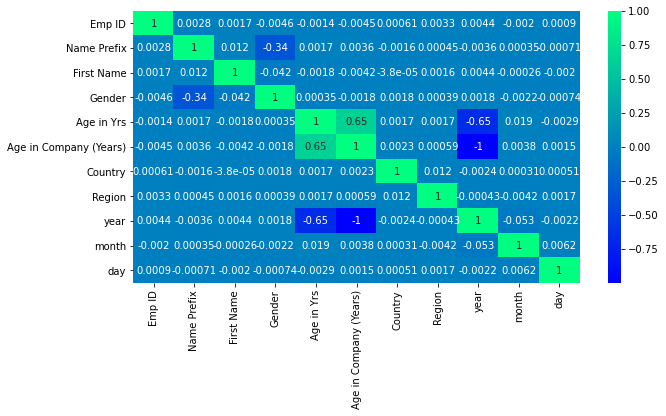

In [45]:
plt.figure(figsize= (10,5))
sns.heatmap(X.corr(), annot = True, cmap="winter")
plt.show()

In [49]:
scale = StandardScaler()
X_transform = scale.fit_transform(X)

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=42)